In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import os
from tqdm import tqdm
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

repo_path = "/home/tudor/Documents/GitHub/building_resilience"

import helper_functions as hf
os.chdir(repo_path + "/models/top_to_bottom/resources/")
import extra_resources as extra
os.chdir(repo_path + "/models/top_to_bottom")

In [2]:
climate = pd.read_csv(repo_path + '/data/top_to_bottom/data/climate_data/era5_reanalysis.csv')

prediction = pd.read_csv(repo_path + '/data/top_to_bottom/data/climate_data/QM_future_climate.csv')

# country codes for countries written in the WB format
WBs = pd.read_csv(repo_path + '/data/top_to_bottom/data/help_data/WB_country_code.csv')
WBs = WBs.dropna(axis = 0).reset_index(drop=True)

/home/tudor/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
def get_climate_year(climate_data, year):
    year_of_interest = climate_data[climate_data['yr'] == str(year)]
    
    mid_lat_p = []
    mid_lon_p = []
    country_name = []
    
    for i in range(len(year_of_interest)):
        mid_lat_p.append(np.mean((float(year_of_interest['lati_st'].iloc[i]),float(year_of_interest['lati'].iloc[i]))))
        mid_lon_p.append(np.mean((float(year_of_interest['longi_st'].iloc[i]),float(year_of_interest['longi'].iloc[i]))))
        country_name.append(extra.whichCountry((mid_lat_p[i],mid_lon_p[i])))
        
    year_of_interest['country name'] = country_name
    return year_of_interest

def get_country_CDD(country_code, dataset):
    
    points_in_country = list(dataset[dataset['country name'] == country_code]['CDD'])
    cumulative_cdd = 0
    for i in range(len(points_in_country)):
        cumulative_cdd += float(points_in_country[i])
        
    cumulative_cdd = cumulative_cdd/len(points_in_country)
    
    return cumulative_cdd

def check_coverage(dataset):
    
    x = list(dataset['longi'])
    y = list(dataset['lati'])
    z = list(dataset['CDD'])

    X = [];Y = []; Z = []


    for i in range(len(dataset)):
        if (float(x[i])>180):
            X.append(float(x[i]) -360)
        else:
            X.append(float(x[i]))
        Y.append(float(y[i]))
        Z.append(float(z[i]))
    
    m = Basemap()
    m.drawcoastlines()
    m.drawmapboundary(fill_color='white')
    plt.scatter(X,Y)
    plt.show()
    

In [25]:
test_2000 = get_climate_year(climate,2000)

100%|██████████| 30130/30130 [02:09<00:00, 232.21it/s]
/home/tudor/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [47]:
for i in range(18):
    
    j = i+2000
    print('Start '+str(j))
    dummy_climate = get_climate_year(climate,j)
    
    dummy_list_CDDs = []
    for k in range(len(WBs)):
        try: dummy_list_CDDs.append(get_country_CDD(WBs['Country Code'].iloc[k],dummy_climate))
        except: dummy_list_CDDs.append(0)
            
    WBs[str(j)] = dummy_list_CDDs
    
    print('Finished '+str(j))

Start 2000


/home/tudor/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


Finished 2000
Start 2001
Finished 2001
Start 2002
Finished 2002
Start 2003
Finished 2003
Start 2004
Finished 2004
Start 2005
Finished 2005
Start 2006
Finished 2006
Start 2007
Finished 2007
Start 2008
Finished 2008
Start 2009
Finished 2009
Start 2010
Finished 2010
Start 2011
Finished 2011
Start 2012
Finished 2012
Start 2013
Finished 2013
Start 2014
Finished 2014
Start 2015
Finished 2015
Start 2016
Finished 2016
Start 2017
Finished 2017


In [51]:
WBs.to_csv('temp.csv')

In [54]:
prediction['yr'].nunique()

11

In [56]:
for i in tqdm(range(10)):
    
    j = i+2021
    print('Start '+str(j))
    dummy_climate = get_climate_year(prediction,j)
    
    dummy_list_CDDs = []
    for k in range(len(WBs)):
        try: dummy_list_CDDs.append(get_country_CDD(WBs['Country Code'].iloc[k],dummy_climate))
        except: dummy_list_CDDs.append(0)
            
    WBs[str(j)] = dummy_list_CDDs
    
    print('Finished '+str(j))




  0%|          | 0/10 [00:00<?, ?it/s]

Start 2021


/home/tudor/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]



 10%|█         | 1/10 [00:28<04:18, 28.72s/it]

Finished 2021
Start 2022





 20%|██        | 2/10 [01:12<04:50, 36.30s/it]

Finished 2022
Start 2023





 30%|███       | 3/10 [01:45<04:05, 35.07s/it]

Finished 2023
Start 2024





 40%|████      | 4/10 [02:10<03:15, 32.58s/it]

Finished 2024
Start 2025





 50%|█████     | 5/10 [02:34<02:34, 30.94s/it]

Finished 2025
Start 2026





 60%|██████    | 6/10 [02:59<01:59, 29.99s/it]

Finished 2026
Start 2027





 70%|███████   | 7/10 [03:24<01:27, 29.19s/it]

Finished 2027
Start 2028





 80%|████████  | 8/10 [03:48<00:57, 28.62s/it]

Finished 2028
Start 2029





 90%|█████████ | 9/10 [04:13<00:28, 28.19s/it]

Finished 2029
Start 2030





100%|██████████| 10/10 [04:38<00:00, 27.82s/it]




Finished 2030


In [20]:
# quick test for various countries:
list_rnd_countries = ['USA','CHN', 'AUS', 'ISR', 'ROU', 'FRA','ESP', 'DEU', 'ARG']
for i in range(len(list_rnd_countries)):
    
    test_c = list_rnd_countries[i]
    print(get_country_CDD(test_c, test_2000), '              ', get_country_CDD(test_c, future_2029))

741.6112888588895                547.6847806210613
538.7763005991966                508.1177629665169
1634.3260460539573                2031.8307061251426
1042.3619                1544.1918
266.09006888                178.50943857142855
214.3045690369444                368.5570828571428
462.93561950000003                554.2433993333333
70.29098427045457                92.7484105
626.1906209479001                708.1581239522386


In [22]:
test_country = 'ISR'

print(test_2000[test_2000['country name'] == test_country])
print(future_2029[future_2029['country name'] == test_country])

        Unnamed: 0    yr surface day_of_year       MX2T       cel        CDD  \
938599        21.0  2000     0.0       36398  53935.062  5314.362  1042.3619   

       run model lati_st longi_st lati longi country name  
938599   0   NaN      32       35   33    36          ISR  
       Unnamed: 0    yr      bc_qm       cel        CDD     run       model  \
54525         8.0  2029  64539.992  6632.192  1544.1918  r1i1p1  HadGEM2-CC   

      lati_st longi_st lati longi country name  
54525      30       34   32    36          ISR  


In [14]:
a = get_climate_year(prediction,2021)

100%|██████████| 7616/7616 [00:50<00:00, 150.88it/s]
/home/tudor/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [21]:
try: print(get_country_CDD('BLZ', a))
except: print(0)    

1205.4138


In [23]:
def mean(a,b):
    return ((a+b)/2)

aaa = new_climate_2000[new_climate_2000['country name'] == 'ROU']
aaa_lat = []
aaa_lon = []
for i in range(len(aaa)):
    
    aaa_lat.append(mean(float(aaa['lati_st'].iloc[i]),float(aaa['lati'].iloc[i])))
    aaa_lon.append(mean(float(aaa['longi_st'].iloc[i]),float(aaa['longi'].iloc[i])))

NameError: name 'new_climate_2000' is not defined

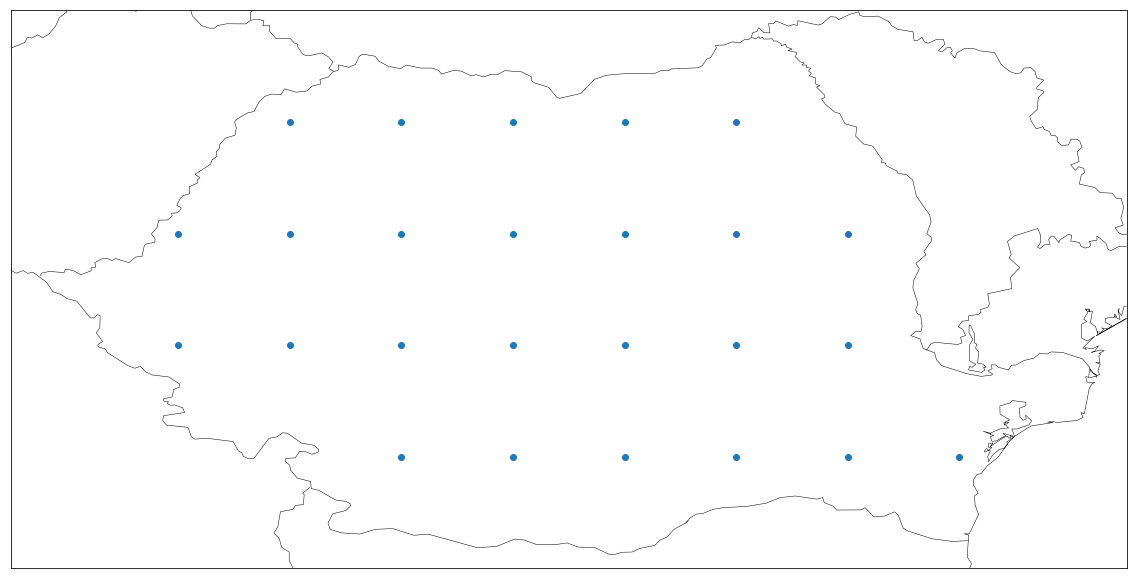

In [35]:
mplot = Basemap(llcrnrlat = 43.5, urcrnrlat= 48.5, llcrnrlon = 20, urcrnrlon = 30,resolution = 'i')

f,ax = plt.subplots(figsize = (20,20))
mplot.drawcoastlines(linewidth=0.5)
mplot.drawcountries(linewidth=0.5)



plt.scatter(aaa_lon,aaa_lat)

In [36]:
bbb = future_2029[future_2029['country name'] == 'ROU']
bbb_lat = []
bbb_lon = []
for i in range(len(bbb)):
    
    bbb_lat.append(mean(float(bbb['lati_st'].iloc[i]),float(bbb['lati'].iloc[i])))
    bbb_lon.append(mean(float(bbb['longi_st'].iloc[i]),float(bbb['longi'].iloc[i])))

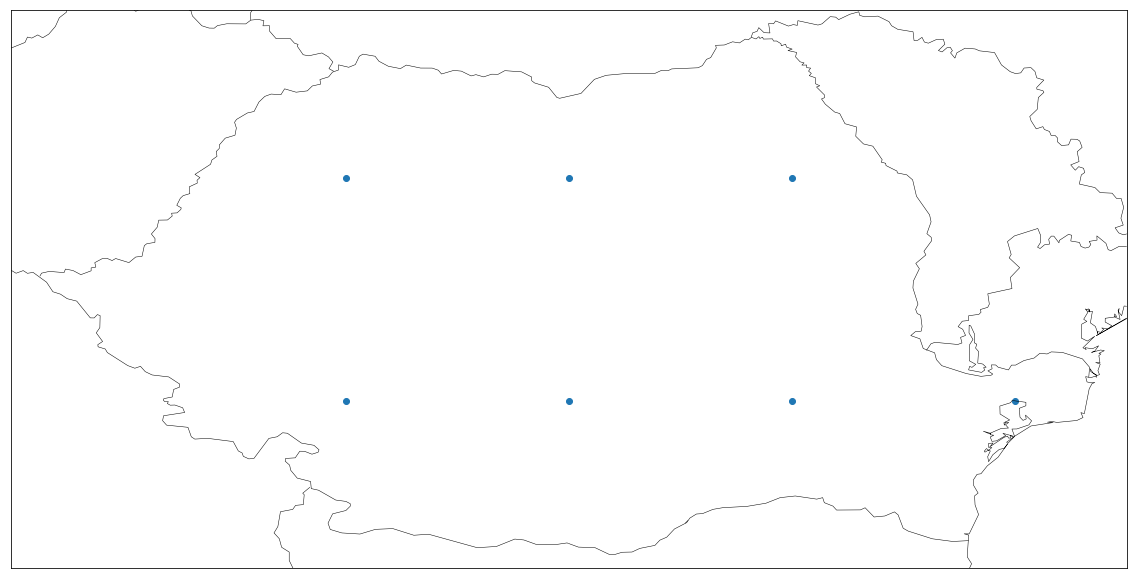

In [37]:
mplot = Basemap(llcrnrlat = 43.5, urcrnrlat= 48.5, llcrnrlon = 20, urcrnrlon = 30,resolution = 'i')

f,ax = plt.subplots(figsize = (20,20))
mplot.drawcoastlines(linewidth=0.5)
mplot.drawcountries(linewidth=0.5)



plt.scatter(bbb_lon,bbb_lat)

In [26]:
climate_new = pd.read_csv('data/climate_data/mer.csv')

/home/tudor/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [27]:
climate_new = climate_new.drop(columns=['MX2T','Unnamed: 0', 'surface', 'day_of_year', 'cel', 'run', 'model'])

In [28]:
new_climate_2000 = get_climate_year(climate_new,2000)

100%|██████████| 30130/30130 [01:42<00:00, 294.01it/s]
/home/tudor/.local/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [29]:
x = list(new_climate_2000['longi'])
y = list(new_climate_2000['lati'])
z = list(new_climate_2000['CDD'])

X = [];Y = []; Z = []


for i in range(len(new_climate_2000)):
    if (float(x[i])>=180):
        X.append(float(x[i]) -360)
    else:
        X.append(float(x[i]))
    Y.append(float(y[i]))
    Z.append(float(z[i]))
    
    
min(X), max(X)

(-180.0, 179.0)

/usr/local/lib/python3.5/dist-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


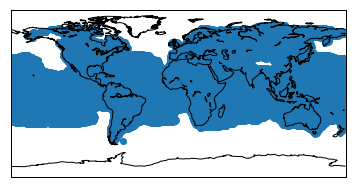

In [30]:
# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
m = Basemap()
# draw coastlines.
m.drawcoastlines()
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='white')
# fill continents, set lake color same as ocean color.
# m.fillcontinents(color='coral',lake_color='aqua')

plt.scatter(X,Y)
plt.show()

